<a href="https://colab.research.google.com/github/safeai-snu/Econometrics/blob/main/Ch3.3.ARIMA_errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.2.1. Stochastic and Deterministic Trend

### 결정적 추세와 확률적 추세에 따른 호주 비행기 탑승객 수 추정

#### 모듈과 데이터 불러오기

In [1]:
#모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')

In [8]:
#데이터 불러오기
aus_airpassengers = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.4/aus_airpassengers.csv')
aus_airpassengers['Year'] = pd.to_datetime(aus_airpassengers['Year'], format='%Y')
aus_airpassengers.index = aus_airpassengers['Year']
aus_airpassengers = aus_airpassengers[['Passengers']]
aus_airpassengers

,Passengers
Year,
1970-01-01,7.318700
1971-01-01,7.326600
1972-01-01,7.795600
1973-01-01,9.384600
1974-01-01,10.664700
1975-01-01,11.055100
1976-01-01,10.864300
1977-01-01,11.306500
1978-01-01,12.122300


#### 호주 비행기 탑승객 수 시각화

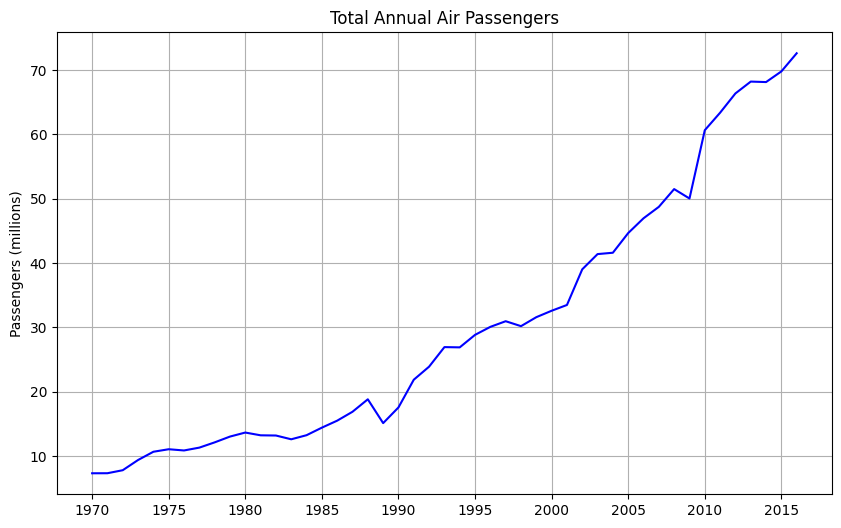

In [9]:
#데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(aus_airpassengers,  color='b')

plt.ylabel('Passengers (millions)')
plt.title('Total Annual Air Passengers')
plt.grid(True)

plt.show()

#### 각 추세에 대한 모델 적합 결과

In [10]:
#결정적 추세 모델 적합
time_trend = np.arange(len(aus_airpassengers))
model_deterministic = SARIMAX(aus_airpassengers['Passengers'], exog=time_trend, order=(1, 0, 0), trend='n', simple_differencing=False)
fit_deterministic = model_deterministic.fit(disp=False)

fit_deterministic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   47
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -100.943
Date:                Fri, 03 Jan 2025   AIC                            207.886
Time:                        03:06:50   BIC                            213.437
Sample:                    01-01-1970   HQIC                           209.975
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4606      0.257      5.674      0.000       0.956       1.965
ar.L1          0.9545      0.078     12.294      0.000       0.802       1.107
sigma2         4.0799      0.504      8.093      0.000       3.092       5.068
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               118.63
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               4.69   Skew:                             1.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
#확률적 추세 모델 적합
model_stochastic = SARIMAX(aus_airpassengers['Passengers'], order=(0, 1, 0), trend='c', simple_differencing=False)
fit_stochastic = model_stochastic.fit(disp=False)

fit_stochastic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   47
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -98.156
Date:                Fri, 03 Jan 2025   AIC                            200.311
Time:                        03:06:52   BIC                            203.969
Sample:                    01-01-1970   HQIC                           201.681
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4191      0.367      3.866      0.000       0.700       2.139
sigma2         4.1777      0.489      8.552      0.000       3.220       5.135
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               129.55
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               6.63   Skew:                             1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### 모델을 이용한 예측

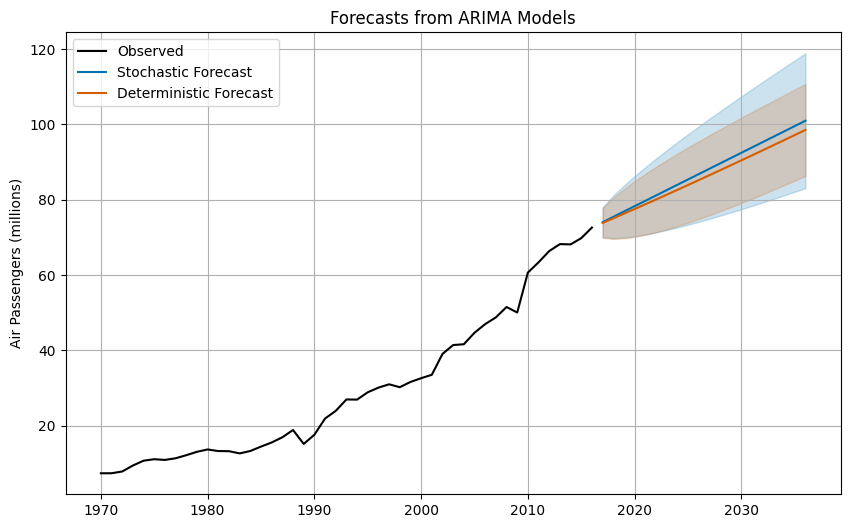

In [12]:
#결정적 추세 모델 예측
future_trend = np.arange(len(aus_airpassengers), len(aus_airpassengers) + 20)
forecast_deterministic = fit_deterministic.get_forecast(steps=20, exog=future_trend)
forecast_deterministic_mean = forecast_deterministic.predicted_mean
forecast_deterministic_ci = forecast_deterministic.conf_int(alpha=0.05)

#확률적 추세 모델 예측
forecast_stochastic = fit_stochastic.get_forecast(steps=20)
forecast_stochastic_mean = forecast_stochastic.predicted_mean
forecast_stochastic_ci = forecast_stochastic.conf_int(alpha=0.05)

#예측 시각화
plt.figure(figsize=(10, 6))
plt.plot(aus_airpassengers.index, aus_airpassengers['Passengers'], label='Observed', color='black')

plt.plot(forecast_stochastic_mean, label='Stochastic Forecast', color='#0072B2')
plt.fill_between(forecast_stochastic_mean.index,
                 forecast_stochastic_ci.iloc[:, 0],
                 forecast_stochastic_ci.iloc[:, 1],
                 color='#0072B2', alpha=0.2)

plt.plot(forecast_deterministic_mean, label='Deterministic Forecast', color='#D55E00')
plt.fill_between(forecast_deterministic_mean.index,
                 forecast_deterministic_ci.iloc[:, 0],
                 forecast_deterministic_ci.iloc[:, 1],
                 color='#D55E00', alpha=0.2)

plt.ylabel('Air Passengers (millions)')
plt.title('Forecasts from ARIMA Models')
plt.legend()
plt.grid(True)
plt.show()

# 4.2.3. 기타 유용한 모델

## 동적 조화 회귀(Dynamic Harmonic Regression)

### 호주 식음료 서비스 재고율 추정

#### 모듈과 데이터 불러오기

In [13]:
#모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')

In [43]:
#데이터 불러오기
aus_retail = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.4/aus_retail.csv", index_col=0)
aus_retail['Month'] = pd.to_datetime(aus_retail['Month'], format='%Y %m')
aus_cafe = aus_retail[aus_retail['Industry'] == "Cafes, restaurants and takeaway food services"]
aus_cafe.index = aus_cafe['Month']
monthly_turnover = aus_cafe.groupby(aus_cafe['Month'])['Turnover'].sum()
monthly_turnover = monthly_turnover.loc['2004-01-01':]
monthly_turnover

Month
2004-01-01    1895.1
2004-02-01    1765.7
2004-03-01    1872.8
2004-04-01    1873.7
2004-05-01    1846.0
               ...  
2018-08-01    3908.2
2018-09-01    3863.2
2018-10-01    3929.1
2018-11-01    3934.4
2018-12-01    4278.9
Name: Turnover, Length: 180, dtype: float64

#### 푸리에 항 생성

In [39]:
#푸리에 항 생성 함수
def fourier_series(x, K, period):
    n = len(x)
    t = np.arange(1, n + 1)
    results = pd.DataFrame(index=x.index)
    for k in range(1, K + 1):
        results[f'sin_{k}'] = np.sin(2 * np.pi * k * t / period)
        results[f'cos_{k}'] = np.cos(2 * np.pi * k * t / period)
    return results

#### K에 따른 ARIMA 모델 정의

In [27]:
#K에 따른 ARIMA 파라미터 사전 정의
arima_orders = {
    1: (2, 1, 3),
    2: (5, 1, 1),
    3: (3, 1, 1),
    4: (1, 1, 5),
    5: (2, 1, 0),
    6: (0, 1, 1)
}

#### 동적 조화 모델 적합

In [44]:
#모델 적합 함수
def fit_arima_with_fourier(series, K, order):
    fourier_terms = fourier_series(monthly_turnover, K=K, period=12)

    model = SARIMAX(pd.Series(np.log(series), series.index), exog=fourier_terms, order=order, seasonal_order=(0, 0, 0, 12))
    return model.fit()

#K에 따른 모델 적합
models = {}
aiccs = {}

for K in range(1, 7):
    arima_order = arima_orders[K]  # Use the ARIMA order specific to each K
    model = fit_arima_with_fourier(monthly_turnover, K, arima_order)
    models[K] = model
    aiccs[K] = model.aicc

#### 모델을 이용한 예측

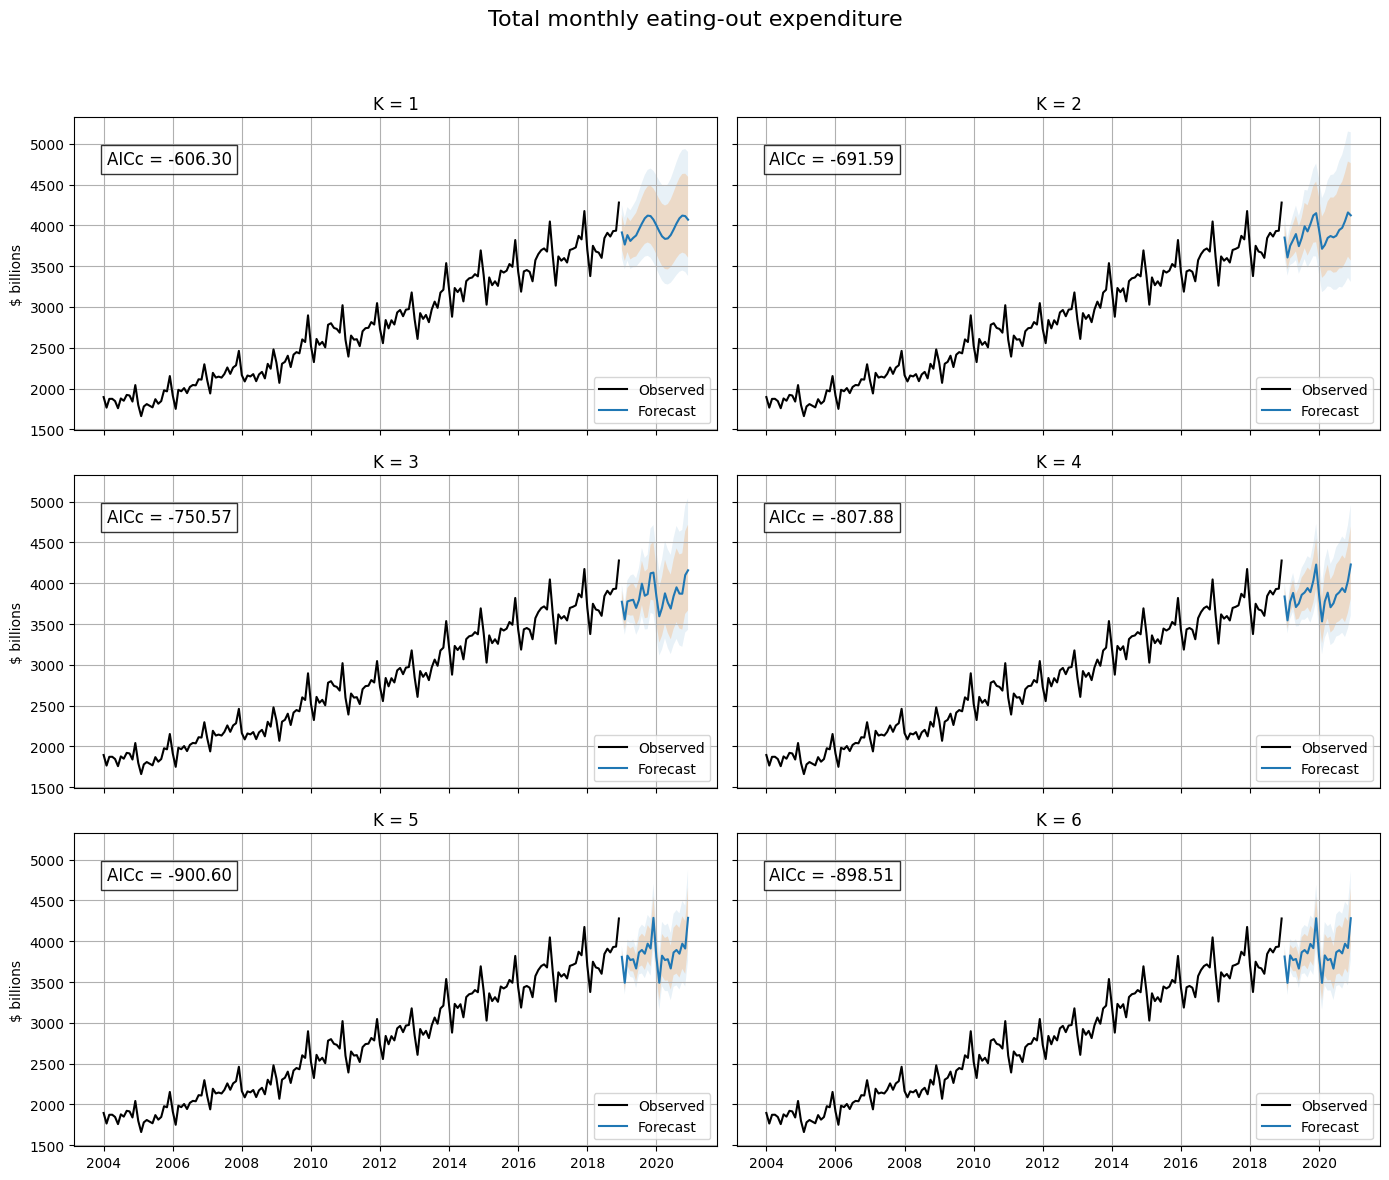

In [45]:
#예측 및 시각화
future_dates = pd.date_range(monthly_turnover.index[-1], periods=24 + 1, freq='M')[1:]

fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, (K, model) in enumerate(models.items()):
    ax = axes[i]

    ax.plot(monthly_turnover, label='Observed', color='black')

    future_fourier = fourier_series(pd.Series(future_dates), K=K, period=12)
    forecast_result = model.get_forecast(steps=24, exog=future_fourier)
    forecast_mean = np.exp(forecast_result.predicted_mean)
    ci95 = np.exp(forecast_result.conf_int(alpha=0.05))
    ci80 = np.exp(forecast_result.conf_int(alpha=0.2))
    ax.plot(forecast_mean, label=f'Forecast')
    ax.fill_between(forecast_mean.index, ci95.iloc[:, 0], ci95.iloc[:, 1], alpha=0.1)
    ax.fill_between(forecast_mean.index, ci80.iloc[:, 0], ci80.iloc[:, 1], alpha=0.2)

    ax.text(0.05, 0.85, f'AICc = {aiccs[K]:.2f}', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
    ax.set_title(f'K = {K}')
    if i % 2 == 0:
        ax.set_ylabel('$ billions')
    ax.legend()
    ax.grid(True)

plt.suptitle('Total monthly eating-out expenditure', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()